<a href="https://colab.research.google.com/github/ori112/car-evaluation/blob/main/car_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
#reading file to df
df = pd.read_csv(r"/content/car_evaluation.csv")

In [ ]:
#inspecting the df head
df.head()

,buying,maint,doors,persons,lug_boot,safety,quality
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
#inspecting dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   quality   1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
#checking for null values
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
quality     0
dtype: int64

In [ ]:
#inspecting unique values in df
print(df["buying"].unique())
print(df["maint"].unique())
print(df["doors"].unique())
print(df["persons"].unique())
print(df["lug_boot"].unique())
print(df["safety"].unique())
print(df["quality"].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['low' 'med' 'high']
['unacc' 'acc' 'vgood' 'good']


In [ ]:
#checking value counts for features and labels
print(df['buying'].value_counts())
print(df["maint"].value_counts())
print(df["doors"].value_counts())
print(df["persons"].value_counts())
print(df["lug_boot"].value_counts())
print(df["safety"].value_counts())
print(df["quality"].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: quality, dtype: int64


<Axes: xlabel='quality', ylabel='count'>

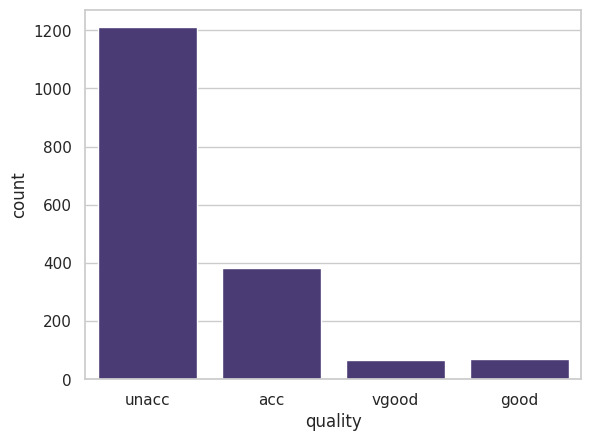

In [ ]:
#visualizing target_label counts
sns.set_theme(style="whitegrid")

# Customize colors
sns.set_palette("viridis")

sns.countplot(data=df, x='quality')

In [ ]:
#initializing label encoder
labels = LabelEncoder()

In [ ]:
#encoding features

df['buying'] = labels.fit_transform(df['buying'])
df["maint"] = labels.fit_transform(df["maint"])
df["doors"] = labels.fit_transform(df["doors"])
df["persons"] = labels.fit_transform(df["persons"])
df["lug_boot"] = labels.fit_transform(df["lug_boot"])
df["safety"] = labels.fit_transform(df["safety"])

#creating an encoding dict
labels = {"unacc": 0, "acc": 1, "good": 2, "vgood": 3}

# Map quality labels to dict values
df["quality"] = df["quality"].map(labels)

# Convert the column to int
df["quality"] = df["quality"].astype(int)

In [ ]:
#inspecting unique values in df after encoding
print(df["buying"].unique())
print(df["maint"].unique())
print(df["doors"].unique())
print(df["persons"].unique())
print(df["lug_boot"].unique())
print(df["safety"].unique())
print(df["quality"].unique())

[3 0 2 1]
[3 0 2 1]
[0 1 2 3]
[0 1 2]
[2 1 0]
[1 2 0]
[0 1 3 2]


In [ ]:
#checking value counts for features and labels after encoding
print(df['buying'].value_counts())
print(df["maint"].value_counts())
print(df["doors"].value_counts())
print(df["persons"].value_counts())
print(df["lug_boot"].value_counts())
print(df["safety"].value_counts())
print(df["quality"].value_counts())

3    432
0    432
2    432
1    432
Name: buying, dtype: int64
3    432
0    432
2    432
1    432
Name: maint, dtype: int64
0    432
1    432
2    432
3    432
Name: doors, dtype: int64
0    576
1    576
2    576
Name: persons, dtype: int64
2    576
1    576
0    576
Name: lug_boot, dtype: int64
1    576
2    576
0    576
Name: safety, dtype: int64
0    1210
1     384
2      69
3      65
Name: quality, dtype: int64


<Axes: xlabel='quality', ylabel='count'>

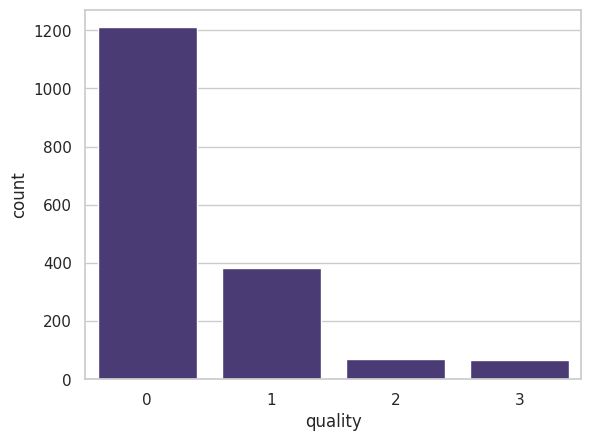

In [ ]:
#visualizing target_label counts after encoding
sns.countplot(data=df, x='quality')

In [ ]:
#splitting df for features and labels
X = df.drop('quality', axis=1)
y = df['quality']

In [ ]:
#splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#scaling data before training
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# decision tree classifier

In [ ]:
#initializing and training dtc as descision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)

In [ ]:
#inspecting classification report
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       0.97      0.92      0.94        83
           2       0.62      0.91      0.74        11
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.90      0.94      0.91       346
weighted avg       0.98      0.97      0.98       346



In [ ]:
#inspecting confusion matrix
print(confusion_matrix(y_test, pred_dtc))

[[235   0   0   0]
 [  1  76   6   0]
 [  0   1  10   0]
 [  0   1   0  16]]


# random forest classifier

In [ ]:
#initializing and training rfc as random forest classifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [ ]:
#inspecting classification report
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       235
           1       0.99      0.87      0.92        83
           2       0.59      0.91      0.71        11
           3       0.94      0.94      0.94        17

    accuracy                           0.96       346
   macro avg       0.87      0.93      0.89       346
weighted avg       0.97      0.96      0.96       346



In [ ]:
#inspecting confusion matrix
print(confusion_matrix(y_test, pred_rfc))

[[235   0   0   0]
 [  4  72   7   0]
 [  0   0  10   1]
 [  0   1   0  16]]


# SVM

In [ ]:
#initializing and training svm as support vecotr model
svm = svm.SVC()
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)

In [ ]:
#inspecting classification report
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       235
           1       0.80      0.80      0.80        83
           2       0.50      0.45      0.48        11
           3       0.94      0.88      0.91        17

    accuracy                           0.90       346
   macro avg       0.80      0.77      0.79       346
weighted avg       0.90      0.90      0.90       346



In [ ]:
#inspecting confusion matrix
print(confusion_matrix(y_test, pred_svm))

[[226   9   0   0]
 [ 12  66   5   0]
 [  0   5   5   1]
 [  0   2   0  15]]


# KNN

In [ ]:
#initializing and training KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

In [ ]:
#inspecting classification report
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       235
           1       0.77      0.71      0.74        83
           2       0.62      0.45      0.53        11
           3       0.93      0.82      0.87        17

    accuracy                           0.88       346
   macro avg       0.81      0.74      0.77       346
weighted avg       0.87      0.88      0.87       346



In [ ]:
#inspecting confusion matrix
print(confusion_matrix(y_test, pred_knn))

[[226   9   0   0]
 [ 20  59   3   1]
 [  0   6   5   0]
 [  0   3   0  14]]
